In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Upload your CSV
# from google.colab import files
# uploaded = files.upload()

# Assume the uploaded file name is 'employee_data.csv'
# data = pd.read_csv(next(iter(uploaded)))

data = pd.read_csv('https://raw.githubusercontent.com/snehavasu-21/Employee_Attrition_Prediction_Code/main/Employee-Attrition.csv')
print("\nFirst 5 Rows:")
display(data.head())



First 5 Rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#Basic Information
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nAttrition Value Counts:")
print(data['Attrition'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel 

In [ ]:
#Encode Target Variable
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

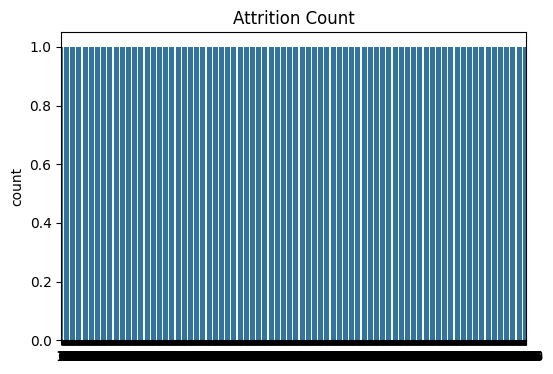

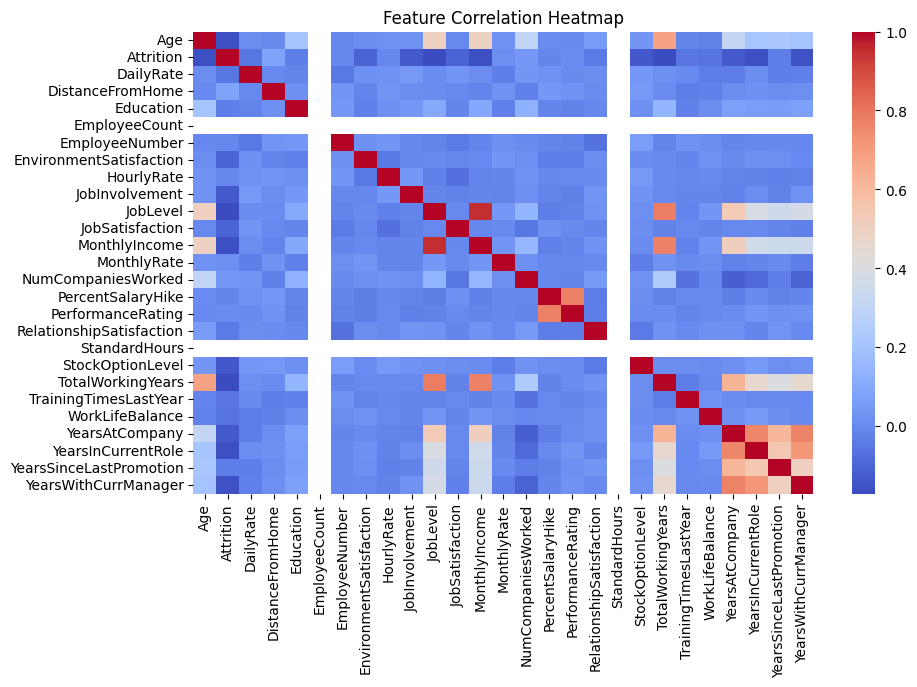

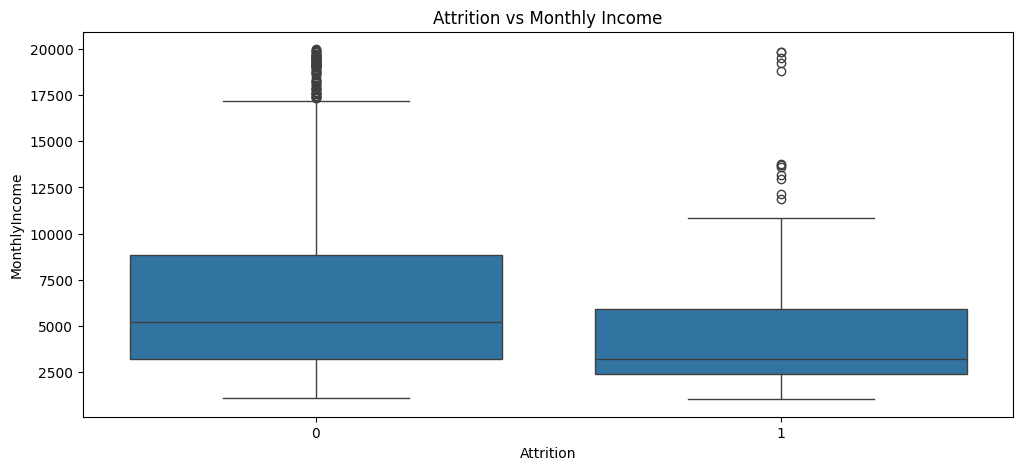

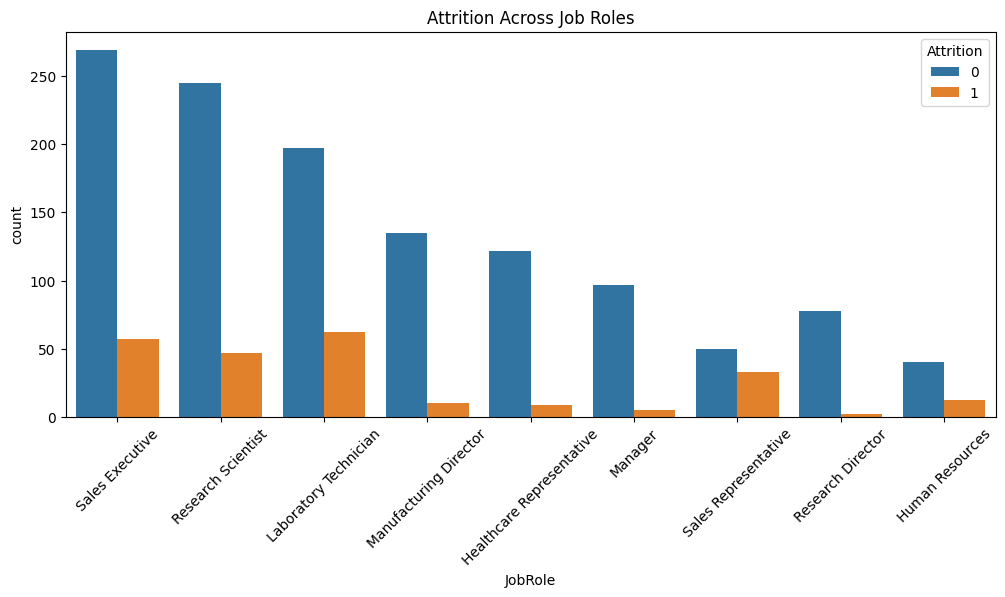

In [ ]:
#EDA (Exploratory Data Analysis)
plt.figure(figsize=(6,4))
sns.countplot(data['Attrition'])
plt.title('Attrition Count')
plt.show()

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Now plot the heatmap safely
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Attrition vs Monthly Income')
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.title('Attrition Across Job Roles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Data Preprocessing

# Drop irrelevant columns
cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
data.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Encode categorical variables
cat_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", list(cat_cols))

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


Categorical Columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [ ]:
#Feature Split

X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [ ]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Model Training

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc


Training Logistic Regression...
Accuracy: 0.8741
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294


Training Decision Tree...
Accuracy: 0.7823
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       247
           1       0.32      0.32      0.32        47

    accuracy                           0.78       294
   macro avg       0.59      0.59      0.59       294
weighted avg       0.78      0.78      0.78       294


Training Random Forest...
Accuracy: 0.8401
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.13      0.20        47

    accuracy                           0.84 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
#Model Comparison

print("\nModel Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")


Model Comparison:
Logistic Regression: 0.8741
Decision Tree: 0.7823
Random Forest: 0.8401
XGBoost: 0.8673


In [ ]:
#Best Model Selection (XGBoost)

best_model = models['XGBoost']

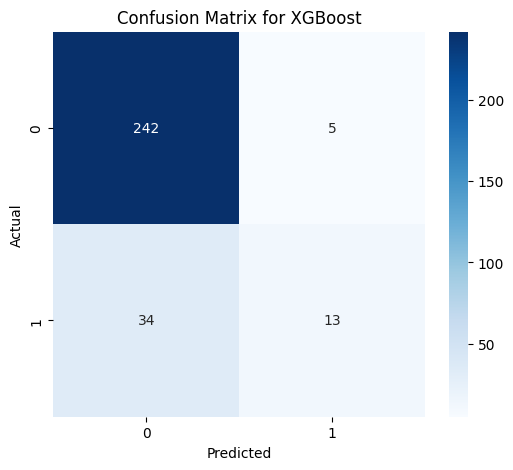

In [ ]:
#Confusion Matrix

y_pred_best = best_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix for XGBoost")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Testing New Input

new_input_dict = {
    'Age': 56,
    'Attrition': 0,  # No -> 0
    'BusinessTravel': label_encoders['BusinessTravel'].transform(['Travel_Rarely'])[0],
    'DailyRate': 1400,
    'Department': label_encoders['Department'].transform(['Research & Development'])[0],
    'DistanceFromHome': 7,
    'Education': 3,
    'EducationField': label_encoders['EducationField'].transform(['Life Sciences'])[0],
    'EmployeeNumber': 1,  # Will be dropped
    'EnvironmentSatisfaction': 112,
    'Gender': label_encoders['Gender'].transform(['Male'])[0],
    'HourlyRate': 49,
    'JobInvolvement': 1,
    'JobLevel': 3,
    'JobRole': label_encoders['JobRole'].transform(['Manufacturing Director'])[0],
    'JobSatisfaction': 4,
    'MaritalStatus': label_encoders['MaritalStatus'].transform(['Single'])[0],
    'MonthlyIncome': 7260,
    'MonthlyRate': 21698,
    'NumCompaniesWorked': 4,
    'Over18': 1,  # Will be dropped
    'OverTime': label_encoders['OverTime'].transform(['No'])[0],
    'PercentSalaryHike': 11,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 1,
    'StandardHours': 80,  # Will be dropped
    'StockOptionLevel': 0,
    'TotalWorkingYears': 37,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 2,
    'YearsAtCompany': 6,
    'YearsInCurrentRole': 4,
    'YearsSinceLastPromotion': 0,
    'YearsWithCurrManager': 2
}

# Convert dict to DataFrame
new_input_df = pd.DataFrame([new_input_dict])

# Drop columns that were dropped during preprocessing
new_input_df = new_input_df.drop(columns=['EmployeeNumber', 'Over18', 'StandardHours'], errors='ignore')

# Reorder columns if necessary
new_input_df = new_input_df[X.columns]

# Scale
new_input_scaled = scaler.transform(new_input_df)

# Predict
new_prediction = best_model.predict(new_input_scaled)
print("\n Prediction for New Employee:")
print(f"Attrition: {'Yes' if new_prediction[0]==1 else 'No'}")



 Prediction for New Employee:
Attrition: No
